# IPO Underpricing Classification

#### in IPO_Clean, we selected all relevant variables and added market returns for 3 and 6 months prior to IPO Date

#### created new csv file named IPODATA that will be used to detect IPO underpricing

In [1]:
#!pip install xgboost
#!pip install dataframe_image

# import data cleaning & processing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import dataframe_image as dfi

# import sklearn libraries


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import functions

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# for saving images

import io
import base64
import os
from IPython.display import display, HTML

%matplotlib inline

In [2]:
# read the data

df = pd.read_csv('IPODATA.csv')
df

,Symbol,Year,Month,Day,dayOfWeek,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,...,highDay260,openDay260,lowDay260,volumeDay260,Sector,Industry,exactDateFounded,IPODATE,markReturn6mo,markReturn3mo
0,A,1999,11,18,3,28.6358,33.5207,27.3725,30.6572,59753154.0,...,29.4363,27.7936,28.9323,2944860.0,Capital Goods,Biotechnology: Laboratory Analytical Instruments,"May,1999",1999-11-18,0.058043,0.058424
1,AAC,2014,10,2,3,18.5000,20.1000,17.6000,20.0000,2799073.0,...,22.6900,22.1100,22.2700,197468.0,Health Care,Medical Specialities,"February,12,2014",2014-10-02,0.029224,-0.014413
2,AAOI,2013,9,26,3,9.9600,10.0900,9.3700,10.0000,948999.0,...,17.9400,16.9100,17.7300,177655.0,Technology,Semiconductors,"February,28,1997",2013-09-26,0.082493,0.055830
3,AAP,2001,11,29,3,13.9000,14.4667,13.3833,13.4000,371100.0,...,17.3033,16.7000,16.7000,0.0,Consumer Services,Other Specialty Stores,1929,2001-11-29,-0.109951,-0.017448
4,AAT,2011,1,13,3,21.2500,22.0000,21.1800,21.5300,15536889.0,...,20.8000,20.0900,20.8000,142910.0,Consumer Services,Real Estate Investment Trusts,"July,16,2010",2011-01-13,0.174028,0.091554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,ZTO,2016,10,27,3,16.5700,18.4500,16.5000,18.4000,55321114.0,...,15.7200,15.3300,15.4800,1018972.0,Transportation,Trucking Freight/Courier Services,"April,2015",2016-10-27,0.021135,-0.012531
2560,ZTS,2013,2,1,4,31.0100,31.7400,30.4700,31.5000,66789484.0,...,30.5400,30.0700,30.3900,5302177.0,Health Care,Major Pharmaceuticals,"July,2012",2013-02-01,0.089281,0.049398
2561,ZUMZ,2005,5,6,4,12.4350,12.5750,10.2500,10.2750,6793424.0,...,35.8900,34.5500,35.4600,138372.0,Consumer Services,Clothing/Shoe/Accessory Stores,"August,1978",2005-05-06,0.006644,-0.024207
2562,ZX,2011,5,12,3,5.8500,6.2000,5.6000,6.0000,4987284.0,...,3.5700,3.4300,3.5200,3849.0,Capital Goods,Auto Parts:O.E.M.,"July,11,2008",2011-05-12,0.119137,0.007326


### Add Classifiers

In [3]:
# create classifier for underpricing after 1 day and 1 year

def dayUnderpricing(row):
    if row['closeDay0'] > row['openDay0']:
        return 1
    else:
        return 0

df['dayUnderpricing'] = df.apply(dayUnderpricing, axis=1)

def yearUnderpricing(row):
    if row['closeDay260'] > row['openDay0']:
        return 1
    else:
        return 0

df['yearUnderpricing'] = df.apply(yearUnderpricing, axis=1)

# calculate percentage of firms that are underpriced after 1 day versus 1 year

percent_dayUnderpricing = df['dayUnderpricing'].mean() * 100
percent_yearUnderpricing = df['yearUnderpricing'].mean() * 100

print(f'The percentage of IPOs underpriced after one day is {percent_dayUnderpricing}')
print(f'The percentage of IPOs underpriced after one year is {percent_yearUnderpricing}')

The percentage of IPOs underpriced after one day is 80.77223088923557
The percentage of IPOs underpriced after one year is 57.99531981279251


### Clean the Data

In [4]:
#checking for null values 

df.isna().sum()

Symbol              0
Year                0
Month               0
Day                 0
dayOfWeek           0
closeDay0           0
highDay0            0
openDay0            0
lowDay0             0
volumeDay0          0
closeDay260         0
highDay260          0
openDay260          0
lowDay260           0
volumeDay260        0
Sector              0
Industry            0
exactDateFounded    0
IPODATE             0
markReturn6mo       0
markReturn3mo       0
dayUnderpricing     0
yearUnderpricing    0
dtype: int64

In [5]:
#checking for duplicates

print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [6]:
#discarding spaces from entries with data type = object

columns = ['Symbol', 'Sector', 'Industry', 'exactDateFounded', 'IPODATE']
for column in columns:
    df[column] = df[column].str.strip()

In [7]:
#to increase readability, replacing column name = openDay0 with initialSharePrice

df.rename(columns={'openDay0': 'initialSharePrice'}, inplace=True)

### Explore the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             2564 non-null   object 
 1   Year               2564 non-null   int64  
 2   Month              2564 non-null   int64  
 3   Day                2564 non-null   int64  
 4   dayOfWeek          2564 non-null   int64  
 5   closeDay0          2564 non-null   float64
 6   highDay0           2564 non-null   float64
 7   initialSharePrice  2564 non-null   float64
 8   lowDay0            2564 non-null   float64
 9   volumeDay0         2564 non-null   float64
 10  closeDay260        2564 non-null   float64
 11  highDay260         2564 non-null   float64
 12  openDay260         2564 non-null   float64
 13  lowDay260          2564 non-null   float64
 14  volumeDay260       2564 non-null   float64
 15  Sector             2564 non-null   object 
 16  Industry           2564 

In [9]:
df.describe()

,Year,Month,Day,dayOfWeek,closeDay0,highDay0,initialSharePrice,lowDay0,volumeDay0,closeDay260,highDay260,openDay260,lowDay260,volumeDay260,markReturn6mo,markReturn3mo,dayUnderpricing,yearUnderpricing
count,2564.000000,2564.000000,2564.000000,2564.000000,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2564.000000,2564.000000,2564.000000,2564.000000
mean,2007.822153,6.723089,15.789002,2.484399,1.681762e+06,1.742227e+06,1.601097e+06,1.735746e+06,1.351804e+07,2.472167e+06,2.506798e+06,2.437662e+06,2.474995e+06,5.895043e+05,0.058465,0.028214,0.807722,0.579953
std,6.544809,3.363258,8.744004,1.259591,7.926190e+07,8.231756e+07,7.551951e+07,8.223199e+07,2.553785e+08,1.174260e+08,1.188576e+08,1.159239e+08,1.173612e+08,3.978929e+06,0.094667,0.063824,0.394167,0.493662
min,1996.000000,1.000000,1.000000,0.000000,4.000000e-04,4.000000e-04,4.000000e-04,4.000000e-04,0.000000e+00,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,0.000000e+00,-0.429334,-0.367160,0.000000,0.000000
25%,2002.000000,4.000000,9.000000,2.000000,9.997500e+00,1.025000e+01,9.550000e+00,1.000000e+01,5.842600e+04,8.936000e+00,9.100000e+00,8.820000e+00,8.970000e+00,7.218750e+03,0.017090,-0.000428,1.000000,0.000000
50%,2009.000000,7.000000,16.000000,3.000000,1.554000e+01,1.648000e+01,1.478000e+01,1.550000e+01,1.968028e+06,1.636180e+01,1.675000e+01,1.612375e+01,1.637330e+01,6.985550e+04,0.062799,0.032903,1.000000,1.000000
75%,2014.000000,10.000000,23.000000,4.000000,2.486563e+01,2.575000e+01,2.399250e+01,2.471250e+01,7.045824e+06,2.753250e+01,2.800000e+01,2.702000e+01,2.750000e+01,3.110015e+05,0.109233,0.063219,1.000000,1.000000
max,2017.000000,12.000000,31.000000,4.000000,4.006800e+09,4.161780e+09,3.817800e+09,4.158000e+09,1.244767e+10,5.938380e+09,6.010200e+09,5.862780e+09,5.934600e+09,1.560415e+08,0.515661,0.356742,1.000000,1.000000


In [10]:
df.Sector.value_counts()

Health Care              481
Consumer Services        445
Finance                  426
Technology               362
Energy                   159
Capital Goods            141
Basic Industries         131
Public Utilities         109
Miscellaneous             95
Consumer Non-Durables     91
Transportation            71
Consumer Durables         53
Name: Sector, dtype: int64

In [11]:
df.Industry.value_counts()

Major Pharmaceuticals                      277
Major Banks                                136
Real Estate Investment Trusts              123
Computer Software: Prepackaged Software     95
Business Services                           94
                                          ... 
Specialty Foods                              1
Other Transportation                         1
Tobacco                                      1
Ordnance And Accessories                     1
Textiles                                     1
Name: Industry, Length: 131, dtype: int64

### Visualize the Data

##### Heatmap of correlation between features

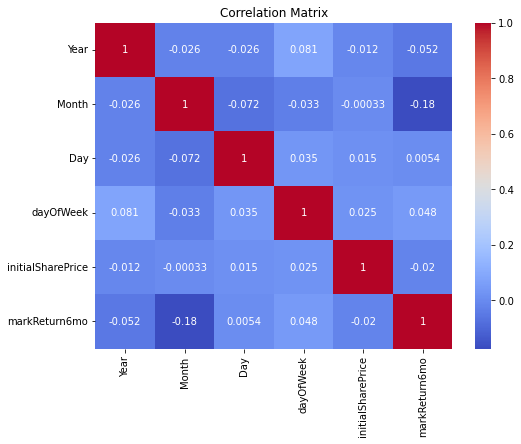

In [12]:
plt.figure(figsize=[8,6])
heatmap = sb.heatmap(df[['Year', 'Month', 'Day', 'dayOfWeek', 'initialSharePrice', 'Sector', 'Industry', 'markReturn6mo']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

#fig = heatmap.figure
#fig.savefig("heatmap.png")

#REF5

##### Number of IPOs by year

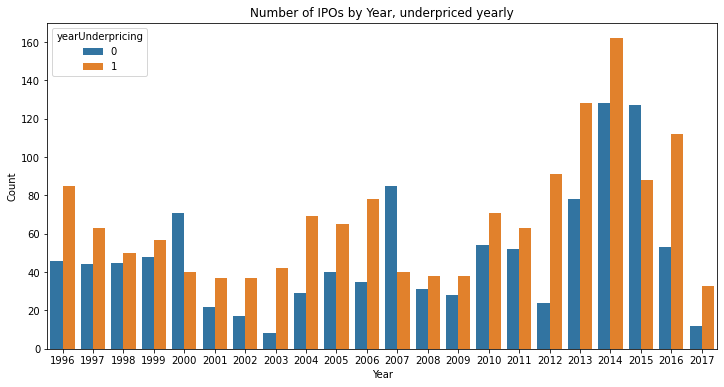

In [13]:
plt.figure(figsize=[12, 6])
sb_plot = sb.countplot(x='Year', data=df, hue='yearUnderpricing')
plt.title('Number of IPOs by Year, underpriced yearly')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#fig = sb_plot.figure
#fig.savefig("number_ipos_underpriced_yearly.png")

#REF4

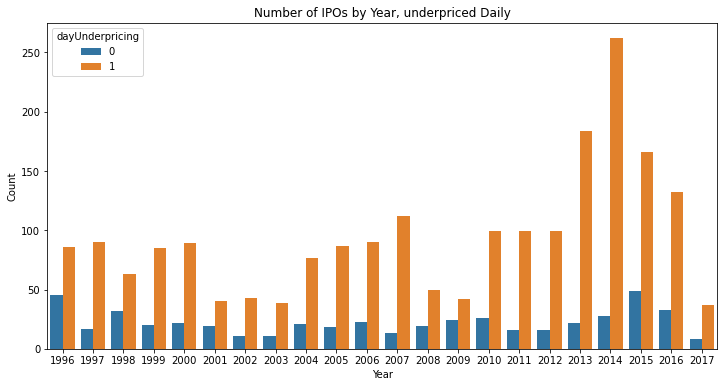

In [14]:
plt.figure(figsize=[12, 6])
sb_plot = sb.countplot(x='Year', data=df, hue='dayUnderpricing')
plt.title('Number of IPOs by Year, underpriced Daily')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#fig = sb_plot.figure
#fig.savefig("number_ipos_underpriced_daily.png")

#REF4

**There is a higher level of underpricing after one day than one year**

* We can identify from both graphs a dip in underpricing associted with the reccesions in 2001 and 2008

 * This suggests that Market Sentiment leading up to the IPO DATE has an influence on underpricing


##### Underpricing by Sector

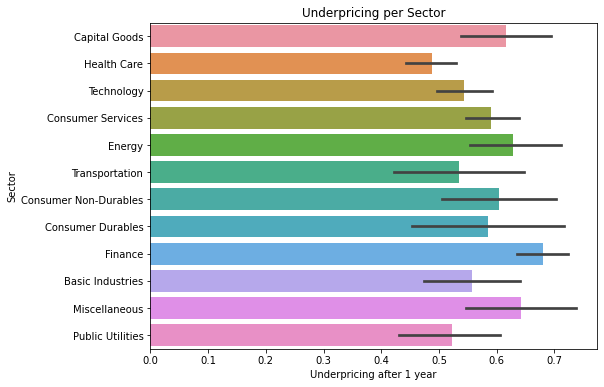

In [15]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'yearUnderpricing', y = 'Sector')
plt.title('Underpricing per Sector')
plt.xlabel('Underpricing after 1 year')
plt.ylabel('Sector');

#fig = ax.figure
#fig.savefig("yearly_underpricing_by_sector.png")

#REF3

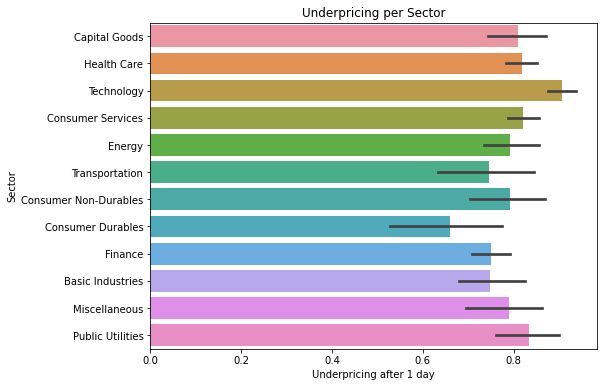

In [16]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'dayUnderpricing', y = 'Sector')
plt.title('Underpricing per Sector')
plt.xlabel('Underpricing after 1 day')
plt.ylabel('Sector');

#fig = ax.figure
#fig.savefig("Daily_underpricing_by_sector.png")

#REF3

**All Sectors have a higher level of daily underpricing than yearly underpricing**

* Some Sectors see a large decrease in underpricing after one year:
 
 * Technology and Healthcare

* Some Sectors maintain a more consistent level of underpricing after one year:
 
 * Finance, Energy and Consumer Durables


### Preprocess the Data

In [17]:
#remove features not being used in the model

df = df.drop(['Symbol','closeDay0','highDay0','lowDay0','volumeDay0','closeDay260','highDay260','openDay260','lowDay260','volumeDay260', 'exactDateFounded', 'IPODATE', 'dayUnderpricing', 'markReturn3mo'], axis=1)
df

,Year,Month,Day,dayOfWeek,initialSharePrice,Sector,Industry,markReturn6mo,yearUnderpricing
0,1999,11,18,3,27.3725,Capital Goods,Biotechnology: Laboratory Analytical Instruments,0.058043,1
1,2014,10,2,3,17.6000,Health Care,Medical Specialities,0.029224,1
2,2013,9,26,3,9.3700,Technology,Semiconductors,0.082493,1
3,2001,11,29,3,13.3833,Consumer Services,Other Specialty Stores,-0.109951,1
4,2011,1,13,3,21.1800,Consumer Services,Real Estate Investment Trusts,0.174028,0
...,...,...,...,...,...,...,...,...,...
2559,2016,10,27,3,16.5000,Transportation,Trucking Freight/Courier Services,0.021135,0
2560,2013,2,1,4,30.4700,Health Care,Major Pharmaceuticals,0.089281,0
2561,2005,5,6,4,10.2500,Consumer Services,Clothing/Shoe/Accessory Stores,0.006644,1
2562,2011,5,12,3,5.6000,Capital Goods,Auto Parts:O.E.M.,0.119137,0


In [18]:
#make a copy of the data

df_prep = df.copy()

In [19]:
# Scaling

numerical = ['initialSharePrice', 'Year', 'Month', 'dayOfWeek']

scaler = MinMaxScaler()
df_prep[numerical] = scaler.fit_transform(df_prep[numerical])

In [20]:
#create dummy variables

df_prep = pd.get_dummies(df_prep)
encoded = list(df_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

150 total features after one-hot encoding.


In [21]:
df_prep

,Year,Month,Day,dayOfWeek,initialSharePrice,markReturn6mo,yearUnderpricing,Sector_Basic Industries,Sector_Capital Goods,Sector_Consumer Durables,...,Industry_Specialty Insurers,Industry_Steel/Iron Ore,Industry_Telecommunications Equipment,Industry_Television Services,Industry_Textiles,Industry_Tobacco,Industry_Transportation Services,Industry_Trucking Freight/Courier Services,Industry_Water Supply,Industry_Wholesale Distributors
0,0.142857,0.909091,18,0.75,7.169600e-09,0.058043,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.857143,0.818182,2,0.75,4.609880e-09,0.029224,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.809524,0.727273,26,0.75,2.454188e-09,0.082493,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.238095,0.909091,29,0.75,3.505396e-09,-0.109951,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.714286,0.000000,13,0.75,5.547593e-09,0.174028,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,0.952381,0.818182,27,0.75,4.321756e-09,0.021135,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2560,0.809524,0.090909,1,1.00,7.980931e-09,0.089281,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2561,0.428571,0.363636,6,1.00,2.684688e-09,0.006644,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2562,0.714286,0.363636,12,0.75,1.466709e-09,0.119137,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Classification Model

#### Model Features:

* Year
* Month
* Day
* dayofWeek
* Sector
* Industry
* markReturn6mo
* openDay0

#### Performance ML Algorithms:

* K Nearest Neighbors
* Random Forest
* XGBoost
* Support Vector Machines
* Radial Based Function Artificial Neural Network

#### Baseline:

*  Logistic Regression

#### Evaluation Metrics:

* Accuracy
* F1-score
* Area under ROC curve


In [22]:
# partition the data

X = df_prep.drop('yearUnderpricing', axis=1)
y = df_prep['yearUnderpricing']

# splitting data into training and test : 80/20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Regularization

In [23]:
#performing ridge regression on the model to prevent overfitting

ridge = Ridge()

# train the model, make predictions on test data and calculate accuracy

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())

#print results

print("Accuracy: ", accuracy)

#REF2

Accuracy:  0.557504873294347


In [24]:
# selecting classifiers

kernel = 1.0 * RBF(1.0)

models = {}
models['LogisticRegression'] = LogisticRegression()
models['SupportVectorClassification'] = SVC()
models['KNN'] = KNeighborsClassifier()
models['RandomForest'] = RandomForestClassifier()
models['XGBoost'] = XGBClassifier()
models['RBFANN'] = GaussianProcessClassifier(kernel=kernel)

# create empty df to store results of evaluation

cv_results = pd.DataFrame(columns=['model_name', 'train_accuracy', 
                                   'test_accuracy', 'train_f1', 'test_f1', 
                                   'train_roc_auc', 'test_roc_auc'])

#REF8

In [25]:
# Testing early performance of all chosen classifiers

for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1', 'roc_auc'], 
                             return_train_score=True, error_score='raise')
    
    # storing results in cv_results
    
    cv_results = cv_results.append({
        'model_name': model_name,
        'train_accuracy': results['train_accuracy'].mean(),
        'test_accuracy': results['test_accuracy'].mean(),
        'train_f1': results['train_f1'].mean(),
        'test_f1': results['test_f1'].mean(),
        'train_roc_auc': results['train_roc_auc'].mean(),
        'test_roc_auc': results['test_roc_auc'].mean(),
    }, ignore_index=True)
    
#dfi.export(cv_results, 'cv_results.png')
    
# print results 

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("Area under ROC:" , 'train: ', results['train_roc_auc'].mean(), '| test: ', results['test_roc_auc'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.6297773253763912 | test:  0.5725450779727096
F1-score: train:  0.7148142159612997 | test:  0.6709223243042006
Area under ROC: train:  0.6677262992837317 | test:  0.5656973288408813
---------------------------------------------------------
SupportVectorClassification:
Accuracy: train:  0.5799532011674997 | test:  0.5799532468323587
F1-score: train:  0.7341396967905327 | test:  0.7341393702271557
Area under ROC: train:  0.6763630713740559 | test:  0.5538429735698926
---------------------------------------------------------
KNN:
Accuracy: train:  0.7011517702105092 | test:  0.5401742202729045
F1-score: train:  0.7524224646305206 | test:  0.6151663292454643
Area under ROC: train:  0.7571489399609518 | test:  0.5307610354762052
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9937598546993194 | test:  0.5908831323099415
F1-score: train:  0.9946200822882847 | test:  0.6795033921648029
Area under ROC: train:  0

#### Values with higher scores indicate stronger model performance

#### We can see that XGBoost and RF are outperforming the other algorithms

* XGBoost slightly outperforms RF in all three evaluation metrics on the testing set

#### Feature Selection

* Perform feature selection on both RF and XGBoost

In [26]:
#create copy of original df

df_conc = df.copy()

# encode all strings in data

for col in df_conc.columns:
    if df_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_conc[col] = encoder.fit_transform(df_conc[col])

In [27]:
# Seperate the data

Xc = df_conc.drop('yearUnderpricing', axis=1)
yc = df_conc['yearUnderpricing']

# Splitting Training and Testing data at a ratio of 0.8 / 0.2

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [28]:
# Create models for top performing algorithms

rf = RandomForestClassifier()
xgb = XGBClassifier()

# train the models
rf.fit(Xc_train, yc_train)
xgb.fit(Xc_train, yc_train)

# get feature importance
rf_feature_importances = rf.feature_importances_
xgb_feature_importances = xgb.feature_importances_

# print the feature importances
print('\nRandom Forest feature importances:')
rf_feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), rf_feature_importances * 100), columns=['feature', 'importance'])
rf_feat_imp_sorted = rf_feat_imp.sort_values(by='importance', ascending=False)
print(rf_feat_imp_sorted)

print('\nXGBoost feature importances:')
xgb_feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), xgb_feature_importances * 100), columns=['feature', 'importance'])
xgb_feat_imp_sorted = xgb_feat_imp.sort_values(by='importance', ascending=False)
print(xgb_feat_imp_sorted)

#REF7




Random Forest feature importances:
             feature  importance
4  initialSharePrice   20.551504
7      markReturn6mo   17.460549
6           Industry   13.767634
2                Day   12.675562
0               Year   11.852607
1              Month    9.361274
5             Sector    7.795286
3          dayOfWeek    6.535585

XGBoost feature importances:
             feature  importance
0               Year   16.448959
4  initialSharePrice   13.458866
3          dayOfWeek   12.171897
5             Sector   12.060191
7      markReturn6mo   11.937768
1              Month   11.932733
6           Industry   11.117395
2                Day   10.872192


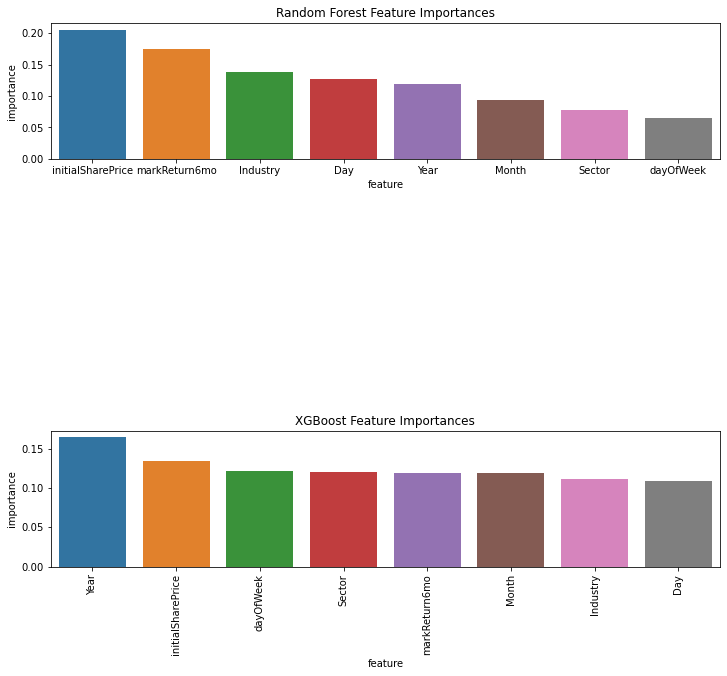

In [29]:
# Graphing bar chart for both models

models = {'Random Forest': rf, 'XGBoost': xgb}

fig, axs = plt.subplots(nrows=len(models), figsize=(12, 10))

# iterate through models and feature importance
for ax, (name, model) in zip(axs, models.items()):
    feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), model.feature_importances_), 
                            columns=['feature', 'importance'])
    feat_imp_sorted = feat_imp.sort_values(by='importance', ascending=False)
    
    # create bar chart
    feat_impo = sb.barplot(data=feat_imp_sorted, x='feature', y='importance', ax=ax)
    plt.xticks(rotation=90)
    ax.set_title(name + ' Feature Importances')
    
    #fig = feat_impo.figure
    #fig.savefig("Feature_Importance.png")

plt.subplots_adjust(hspace=2)
plt.show()

#REF3


* We can see that the RF model has certain variables, such as initialSharePrice and markReturn6mo that have a large significance for the model. The XGBoost model has more uniformity and consistensy across the features

##### All features have importance % higher than the threshold of 4%

* We will keep all variables in the final model

#### Hyperparameter tuning

In [30]:
model = RandomForestClassifier()

# establashing grid hyperparameters

param_grid = {
    
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10, 20]
    
}

#performing grid search, establishing hyperparameters optimized for accuracy of model

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

#establashing rf best parameters

rf_best_params = grid_search.best_params_

# print the results

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

#REF1

Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best accuracy score:  0.6055581271141179


In [31]:
model = XGBClassifier()

# establishing grid parameters

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

#performing grid search, establishing hyperparameters optimized for accuracy of model

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

# establashing xgb best parameters
xgb_best_params = grid_search.best_params_

# print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

#REF 6


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50}
Best accuracy score:  0.6401863390896684


* After hyperparameter tuning, XGBoost still consistently outperforms Random Forest, by a margin of around 3-4% accuracy.
* XGBoost has been selected for the final model

#### Cross Validation for Final Model

In [32]:
#applying optimal hyperparameters to XGB model

model = XGBClassifier(**xgb_best_params)

#Cross Validating XGB Classifier

CV_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1', 'roc_auc'], return_train_score=True)

#print results 

print("Accuracy:" , 'train: ', CV_results['train_accuracy'].mean(), '| test: ', CV_results['test_accuracy'].mean())
print("F1-score:" , 'train: ', CV_results['train_f1'].mean(), '| test: ', CV_results['test_f1'].mean())
print("Area under ROC score:" , 'train: ', CV_results['train_roc_auc'].mean(), '| test: ', CV_results['test_roc_auc'].mean())

Accuracy: train:  0.749805258310737 | test:  0.6326190911306042
F1-score: train:  0.8070150402694589 | test:  0.7213584278826883
Area under ROC score: train:  0.8382873823261251 | test:  0.6589131845793974


* This model can predict IPO underpricing with an accuracy of around 63%
* This outperforms the Logistic Regression Benchmark which predicts underpricing with around 57% accuracy

### References

* REF1 https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
* REF2 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* REF3 https://seaborn.pydata.org/generated/seaborn.barplot.html
* REF4 https://seaborn.pydata.org/generated/seaborn.countplot.html
* REF5 https://seaborn.pydata.org/generated/seaborn.heatmap.html
* REF6 https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
* REF7 https://docs.python.org/3/library/functions.html#zip
* REF8 https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html
